### 머지 소트 트리
- 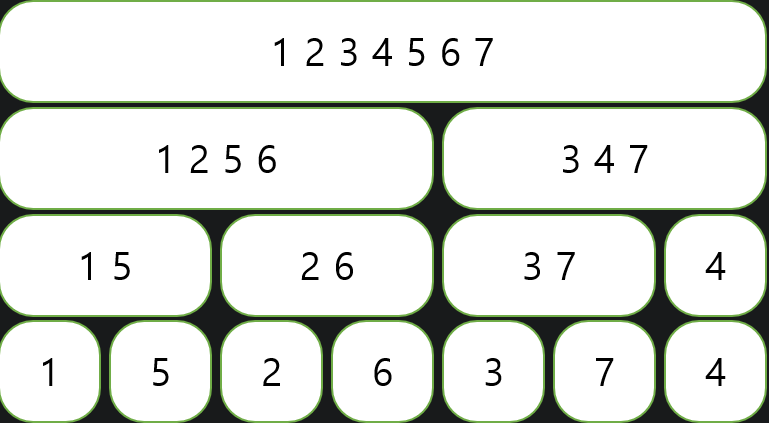
  - https://justicehui.github.io/medium-algorithm/2020/02/25/merge-sort-tree/
- 세그먼트 트리와 비슷한데, 구간의 정렬된 상태를 저장한다.
- 트리의 $i$ 번째 원소를 넣어준 뒤, bottom-up 방식으로 두 노드를 합친다.

In [ ]:
from bisect import bisect
class MST:
  def __init__(self, L):
    self._len = len(L)
    self._size = _size = 1 << (self._len - 1).bit_length()

    self.seg = [[] for _ in range(2 * _size)]
    self.seg[_size:_size + self._len] = [[v] for v in L]

    for i in reversed(range(_size)):
      self.seg[i] = self.merge(self.seg[2 * i], self.seg[2 * i + 1])

  def merge(self, l, r) -> list[int] :
    s = e = 0
    ret = []

    while s < len(l) and e < len(r):
      if l[s] < r[e]:
        ret.append(l[s])
        s += 1
      else:
        ret.append(r[e])
        e += 1

    ret += l[s:]
    ret += r[e:]
    return ret

  def __setitem__(self, i, v):
    i += self._size
    self.seg[i] = v
    i //= 2
    while i:
      self.seg[i] = self.merge(self.seg[2 * i], self.seg[2 * i + 1])
      i //= 2

  def query(self, s, e, x) -> int: # [s, e)
    s += self._size
    e += self._size

    ret = 0
    while s < e: 
      if s & 1:
        if self.seg[s] and self.seg[s][-1] > x :
          ret += len(self.seg[s]) - bisect(self.seg[s], x)
        s += 1
      if e & 1:
        e -= 1  
        if self.seg[e] and self.seg[e][-1] > x :
          ret += len(self.seg[e]) - bisect(self.seg[e], x)
      s //= 2
      e //= 2

    return ret